<a href="https://colab.research.google.com/github/ymaydias/Tech_challenge/blob/main/2%C2%BA_Tech_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importação das bibliotecas básicas**

In [337]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### **Captura da base de dados**

O arquivo utilizado foi baixado em csv a partir site da Investing
https://br.investing.com/indices/bovespa-historical-data

In [338]:
df = pd.read_csv("Dados Históricos - Ibovespa (5).csv", encoding = "utf-8", sep=",")

**Análise de base de dados**

In [339]:
df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,02.01.2024,132.697,134.186,134.195,132.095,"8,44M","-1,11%"
1,28.12.2023,134.185,134.194,134.392,133.832,"7,81M","-0,01%"
2,27.12.2023,134.194,133.523,134.195,133.328,"6,17M","0,49%"
3,26.12.2023,133.533,132.753,133.645,132.753,"5,15M","0,59%"
4,22.12.2023,132.753,132.182,133.035,132.094,"8,23M","0,43%"


In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488 entries, 0 to 1487
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      1488 non-null   object 
 1   Último    1488 non-null   float64
 2   Abertura  1488 non-null   float64
 3   Máxima    1488 non-null   float64
 4   Mínima    1488 non-null   float64
 5   Vol.      1488 non-null   object 
 6   Var%      1488 non-null   object 
dtypes: float64(4), object(3)
memory usage: 81.5+ KB


In [341]:
df.shape

(1488, 7)

In [342]:
df.isnull().sum()

Data        0
Último      0
Abertura    0
Máxima      0
Mínima      0
Vol.        0
Var%        0
dtype: int64

In [343]:
df.duplicated().sum()

0

In [344]:
df.describe()

,Último,Abertura,Máxima,Mínima
count,1488.000000,1488.000000,1488.000000,1488.000000
mean,103.679206,103.642001,104.630611,102.676522
std,14.327687,14.325044,14.259414,14.376283
min,63.570000,63.604000,67.604000,61.691000
25%,95.408000,95.390500,96.390500,94.384500
50%,105.536000,105.532500,106.653000,104.510000
75%,114.827250,114.787500,115.534250,113.483250
max,134.194000,134.194000,134.392000,133.832000


Com as informações acima, concluo que as tipagens estão incorretas e há nomes de colunas com caracteres especiais que podem gerar conflitos nos futuros códigos.

**Aqui, a adaptação é realizada, corrigindo formatações, tipagens e possíveis impedimentos no código.**

In [345]:
df["Data"] = pd.to_datetime(df["Data"], format="%d.%m.%Y", dayfirst=True)

In [346]:
df["Var%"] = df["Var%"].str.rstrip("%").str.replace(",", ".").astype("float")

In [347]:
df = df.rename(columns={"Vol.": "Volume"})

In [348]:
df["Volume"] = df["Volume"].str.replace(",", ".")

def converter_valores(valor):
    if isinstance(valor, str):
        if "M" in valor:
            return float(valor.replace("M", "")) * 1e6
        elif "K" in valor:
            return float(valor.replace("K", "")) * 1e3
        elif "B" in valor:
            return float(valor.replace("B", "")) * 1e9
    return float(valor)

df["Volume"] = df["Volume"].apply(converter_valores)

In [349]:
df = df.dropna()

### **Análise da série temporal - Fechamento da Ibovespa conforme o tempo**

<Axes: xlabel='Último', ylabel='Count'>

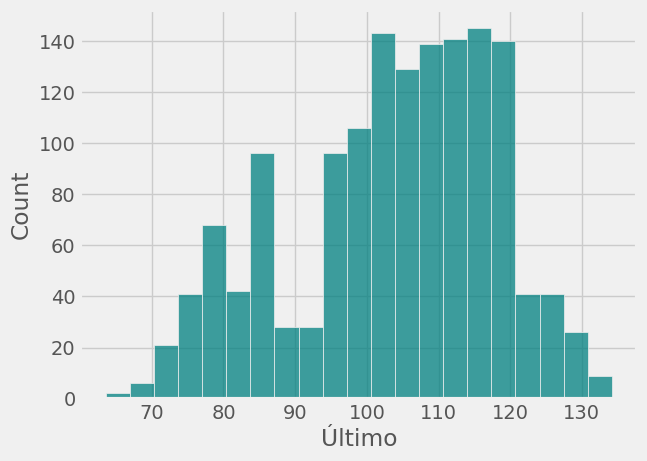

In [350]:
sns.histplot(data= df, x = "Último", color='teal')

É possível analisar que, nestes 7 anos, o fechamento da bolsa que mais se repete é em 100 e 117,5.

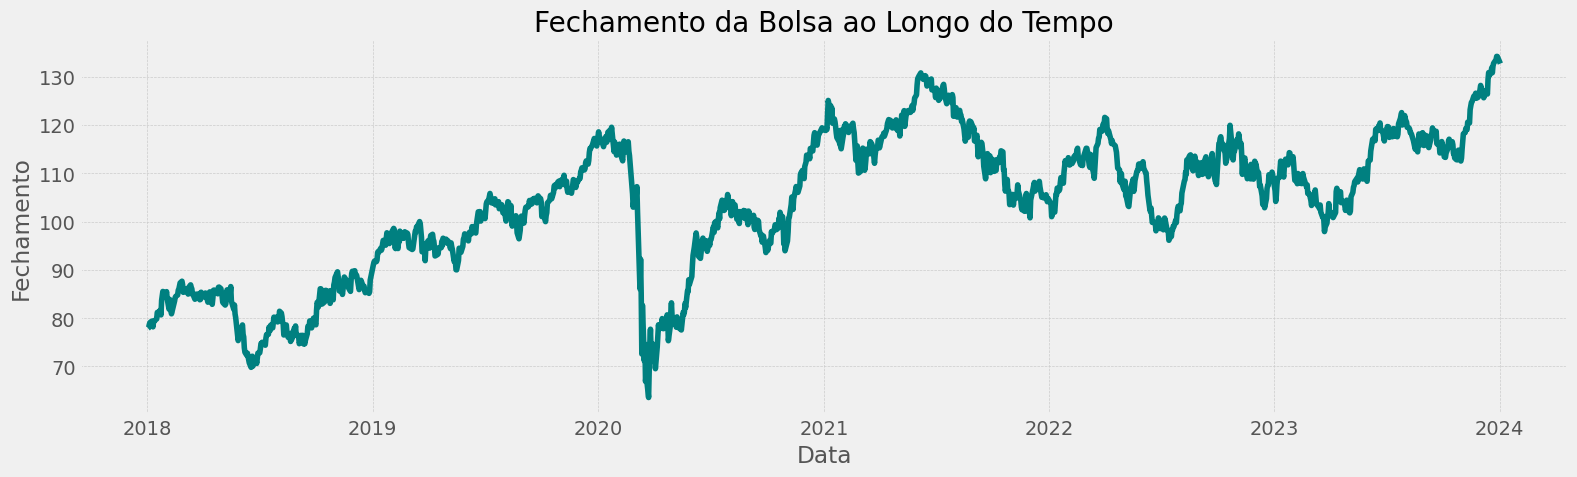

In [351]:
plt.figure(figsize=(16, 5))
plt.plot(df['Data'], df['Último'], color='teal')
plt.xlabel('Data')
plt.ylabel('Fechamento')
plt.title('Fechamento da Bolsa ao Longo do Tempo')
ax1 = plt.gca()
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

Apesar de inúmeras quedas ao longo destes 7 anos, observa-se que o fechamento da bolsa tem demonstrado uma tendência de alta, conforme ilustrado pelo gráfico.

# **Conceitos em séries temporais**

Para decompormos séries temporáis em padrões para melhor entendimento, é importante saber os conceitos de Observado, Tendência, Sazonalidade e Resíduo.

*   Observado: É o ponto de partida da análise. Os dados observados são os valores reais coletados ao longo do tempo. Analisar esses dados ajuda a identificar padrões e tendências que podem estar presentes.
*   Tendência: A tendência é a direção geral e o padrão de longo prazo dos dados. Identificar a tendência ajuda a entender se os dados estão crescendo, decrescendo ou se mantendo constantes ao longo do tempo. Isso é essencial para prever futuros valores.
*   Sazonalidade: A sazonalidade é o padrão que se repete em intervalos regulares, como ciclos diários, semanais, mensais ou anuais. Reconhecer a sazonalidade permite ajustar previsões e entender variações previsíveis nos dados.
*  Resíduo: Após remover a tendência e a sazonalidade, o resíduo é o que resta. Analisar os resíduos ajuda a identificar variações aleatórias ou anomalias que não são explicadas pelos componentes estruturais da série temporal.

Para nossa análise usaremos a biblioteca statsmodels.tsa.seasonal - seasonal_decompose

In [352]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [353]:
analises = seasonal_decompose(df["Último"], model="aditivo", period=12)

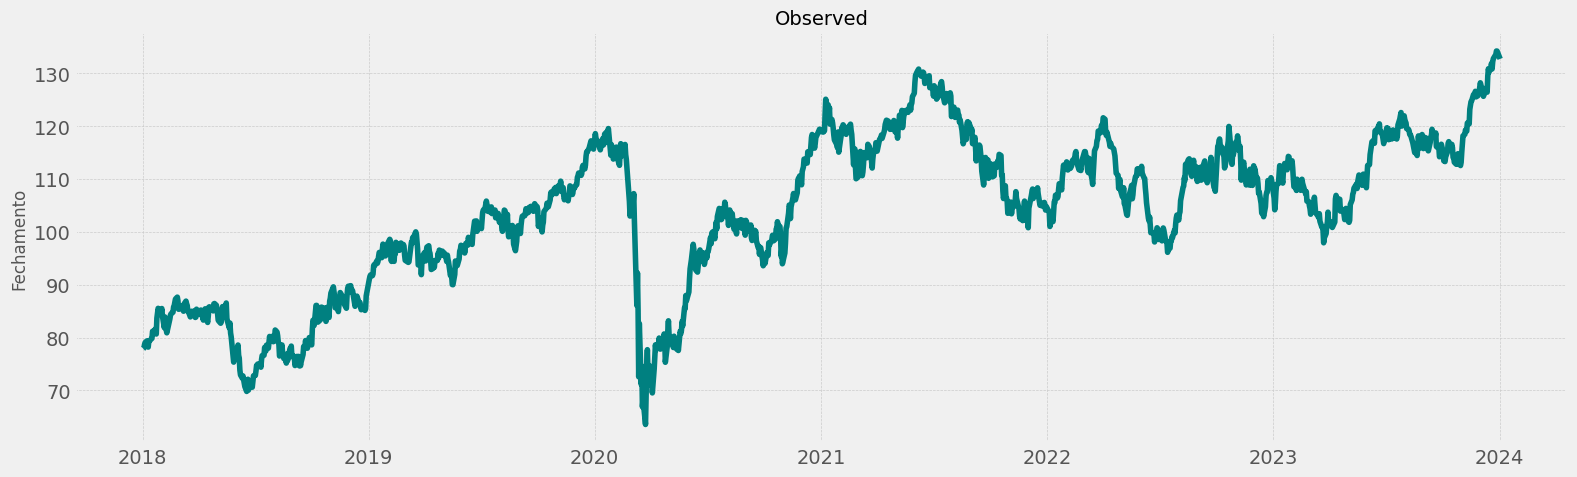

In [354]:
fig, ax1 = plt.subplots(figsize=(16, 5))
ax1.plot(df['Data'], analises.observed, linestyle='-', color='teal')
ax1.set_title('Observed', fontsize=14)
ax1.set_ylabel('Fechamento', fontsize=12)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

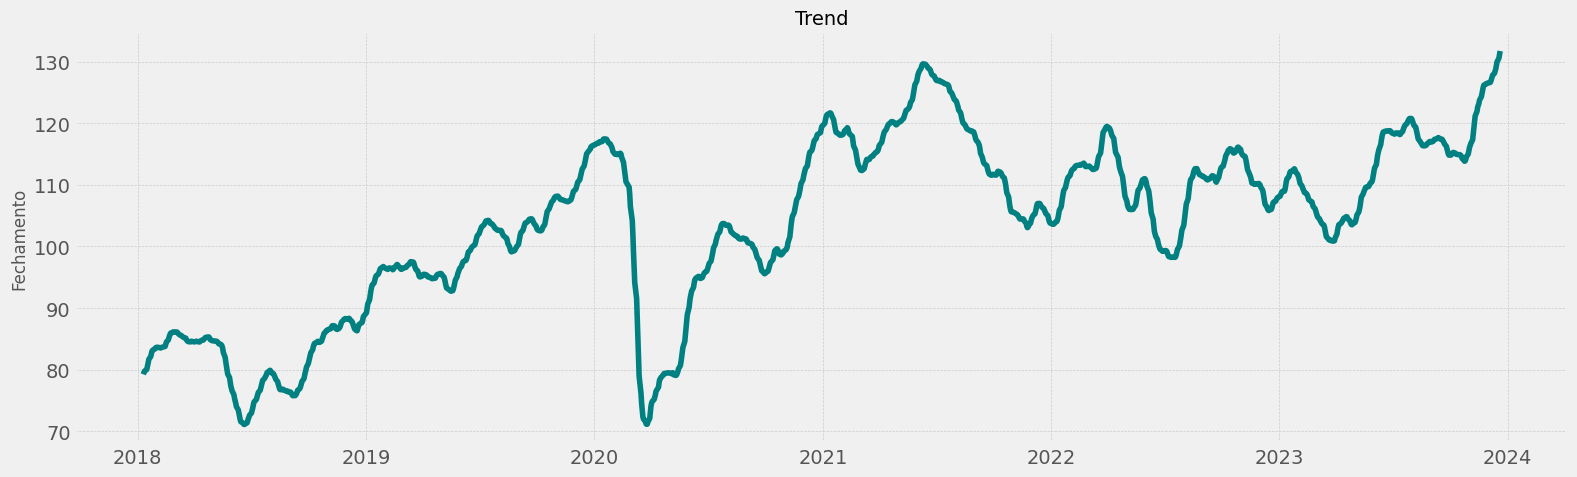

In [355]:
fig, ax2 = plt.subplots(figsize=(16, 5))
ax2.plot(df['Data'], analises.trend, linestyle='-', color='teal')
ax2.set_title('Trend', fontsize=14)
ax2.set_ylabel('Fechamento', fontsize=12)
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

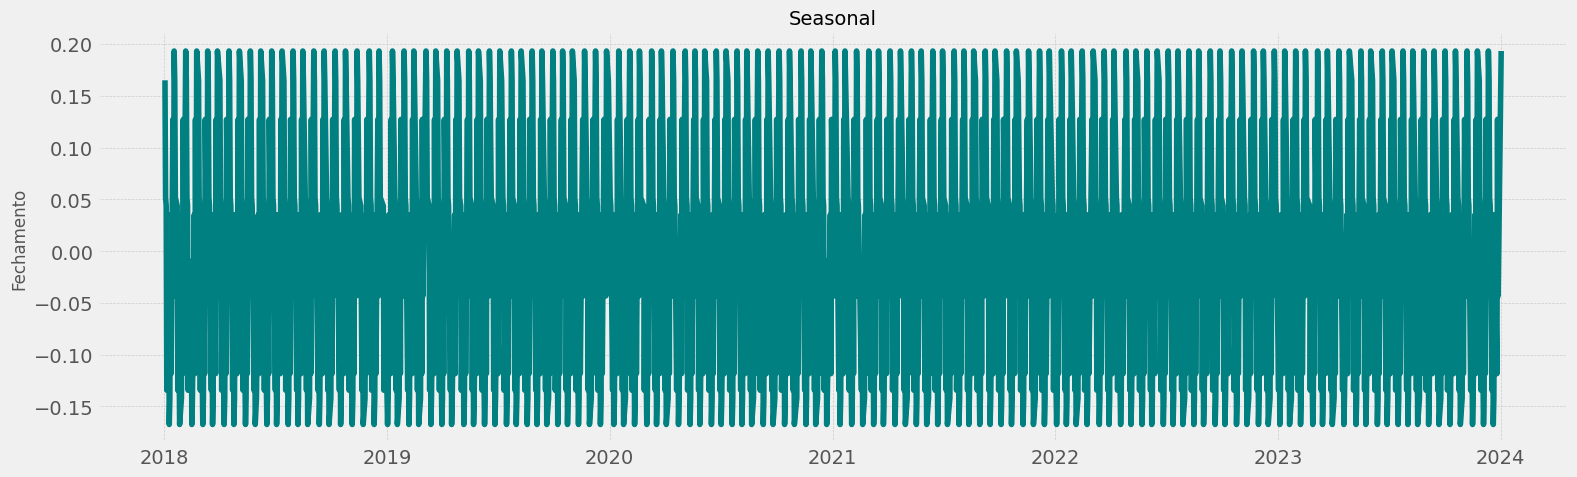

In [356]:
fig, ax3 = plt.subplots(figsize=(16, 5))
ax3.plot(df['Data'], analises.seasonal, linestyle='-', color='teal')
ax3.set_title('Seasonal', fontsize=14)
ax3.set_ylabel('Fechamento', fontsize=12)
ax3.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

A sazonalidade do período analisado é constante, com picos e quedas regulares, um padrão repetitivo.

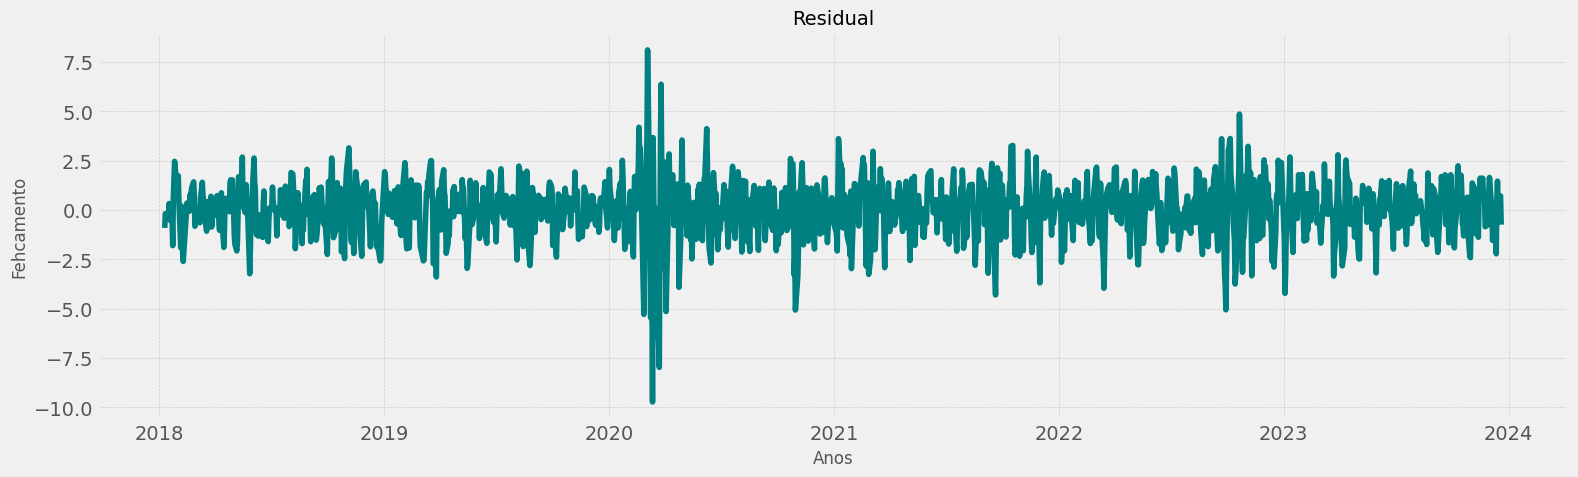

In [357]:
fig, ax4 = plt.subplots(figsize=(16, 5))
ax4.plot(df['Data'], analises.resid, linestyle='-', color='teal')
ax4.set_title('Residual', fontsize=14)
ax4.set_ylabel('Fehcamento', fontsize=12)
ax4.set_xlabel('Anos', fontsize=12)
ax4.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

Aqui, é notável que em 2020, início da pandêmia, ocorreu uma maior incidência de fechamentos "aleatórios", fora do comum.

### **Augmented Dickey-Fuller - Análise de Estacionaridade da série temporal**






A seguir, vamos analisar a estacionaridade dos nossos dados ao longo do tempo, utilizando a técnica de Augmented Dickey-Fuller.

A técnica de Augmented Dickey-Fuller (ADF) é um teste estatístico usado para verificar a estacionaridade de uma série temporal. Estacionaridade significa que as propriedades estatísticas da série, como a média e a variância, são constantes ao longo do tempo. O teste ADF ajuda a determinar se uma série temporal possui uma raiz unitária, indicando a presença de uma tendência não estacionária. Se a hipótese nula de que a série tem uma raiz unitária é rejeitada, isso sugere que a série é estacionária.

Para isso importaremos a biblioteca statsmodels.tsa.stattools adfuller


In [358]:
from statsmodels.tsa.stattools import adfuller

In [359]:
valores_ultimos = df.Último.values

In [360]:
teste_adfuller = adfuller(valores_ultimos)

In [361]:
print(f"Estatística do teste: {teste_adfuller[0]}")
print(f"Valor-p: {teste_adfuller[1]}")

Estatística do teste: -2.3439229201716643
Valor-p: 0.15819285584785975


Neste caso, o valor-p de 0.4628 é significativamente maior que o nível de significância comum de 0.05. Portanto, não podemos rejeitar a hipótese nula de que a série temporal possui uma raiz unitária. Isso implica que não há evidências suficientes para concluir que a série temporal é estacionária.

Nesta análise, optamos por não utilizar transformações adicionais, como a aplicação de logaritmos, para tentar alcançar a estacionariedade da série temporal.

### **Modelo preditivo - Forecast do fechamento diário da Ibovespa**

In [362]:
from prophet import Prophet

In [363]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [364]:
def mean_absolute_percentage_error(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [365]:
df_dropado = df.drop(columns=['Abertura', 'Máxima', 'Mínima', 'Volume', 'Var%'])

In [366]:
 df_renomeado = df_dropado.rename(columns={'Data': 'ds', 'Último': 'y'})

In [367]:
 df_renomeado =  df_renomeado.set_index('ds')

In [368]:
plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

In [369]:
split_date = '2021-12-01'
df_renomeado_train = df_renomeado.loc[df_renomeado.index <= split_date].copy()
df_renomeado_test = df_renomeado.loc[df_renomeado.index > split_date].copy()

Divisão de dados em treino e teste

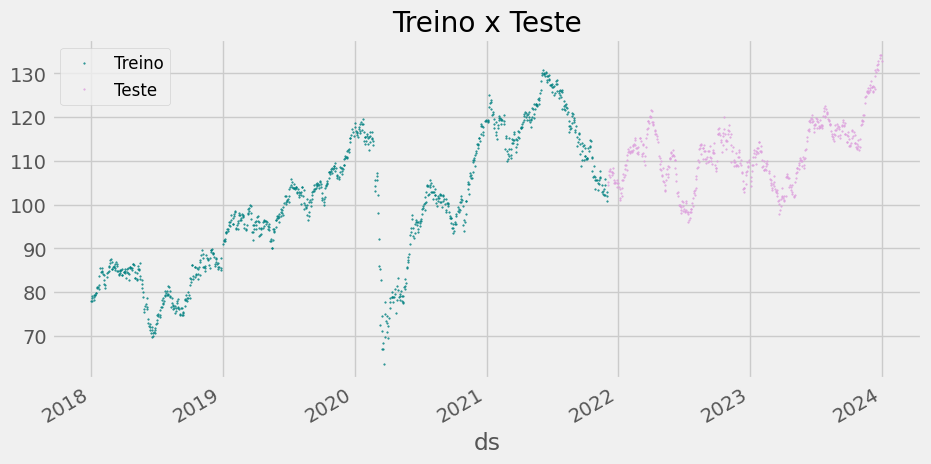

In [370]:
fig, ax = plt.subplots(figsize=(10, 5))
df_renomeado_train.plot(ax=ax, style='.', markersize=1, label='Treino', color='teal')
df_renomeado_test.plot(ax=ax, style='.', markersize=1, label='Teste', color='plum')
plt.title('Treino x Teste')
plt.legend()
ax.legend(['Treino', 'Teste'], fontsize=12, loc='upper left')
plt.show()

In [371]:
df_train_prophet = df_renomeado_train.reset_index()

In [372]:
%%time
model = Prophet()
model.fit(df_train_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe7zob6pk/uam54mn7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe7zob6pk/pg1hoe38.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78914', 'data', 'file=/tmp/tmpe7zob6pk/uam54mn7.json', 'init=/tmp/tmpe7zob6pk/pg1hoe38.json', 'output', 'file=/tmp/tmpe7zob6pk/prophet_modelkpmvumew/prophet_model-20240730003203.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:32:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:32:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


CPU times: user 131 ms, sys: 7.85 ms, total: 138 ms
Wall time: 630 ms


In [373]:
df_test_prophet = df_renomeado_test.reset_index()

In [374]:
df_test_fcst = model.predict(df_test_prophet)

In [375]:
df_test_fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-12-02,114.518693,107.596242,118.650737,114.518693,114.518693,-1.298082,-1.298082,-1.298082,0.601730,0.601730,0.601730,-1.899812,-1.899812,-1.899812,0.0,0.0,0.0,113.220611
1,2021-12-03,114.498308,107.823508,119.131736,114.498308,114.498308,-1.120094,-1.120094,-1.120094,0.523025,0.523025,0.523025,-1.643118,-1.643118,-1.643118,0.0,0.0,0.0,113.378215
2,2021-12-06,114.437156,108.401716,120.053652,114.437156,114.437156,-0.331091,-0.331091,-0.331091,0.593495,0.593495,0.593495,-0.924586,-0.924586,-0.924586,0.0,0.0,0.0,114.106065
3,2021-12-07,114.416772,108.849951,120.304464,114.416772,114.416772,-0.043474,-0.043474,-0.043474,0.664082,0.664082,0.664082,-0.707556,-0.707556,-0.707556,0.0,0.0,0.0,114.373298
4,2021-12-08,114.396388,108.847988,120.131941,114.396388,114.396388,0.140255,0.140255,0.140255,0.643985,0.643985,0.643985,-0.503731,-0.503731,-0.503731,0.0,0.0,0.0,114.536642


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


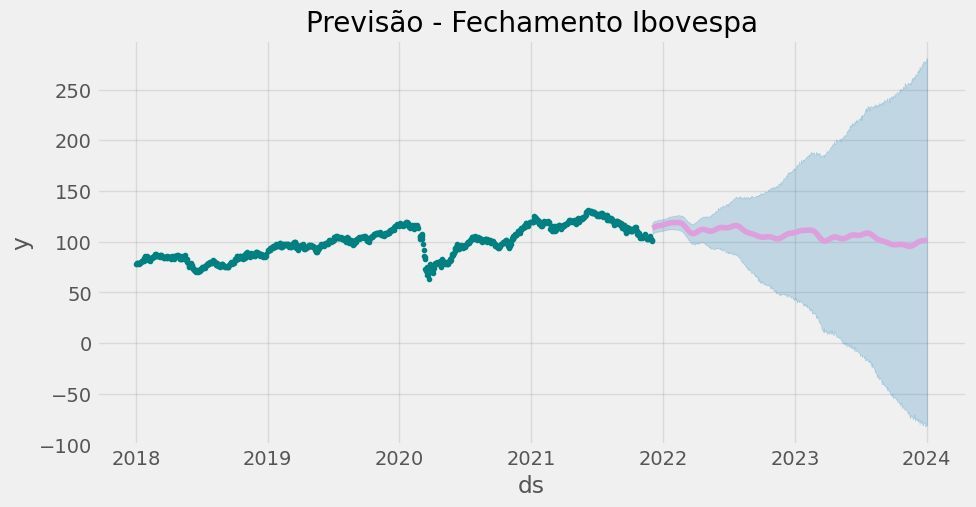

In [376]:
fig, ax = plt.subplots(figsize=(10, 5))
fig = model.plot(df_test_fcst, ax=ax)
lines = ax.get_lines()
lines[0].set_color('teal')
lines[1].set_color('plum')
ax.set_title('Previsão - Fechamento Ibovespa')
plt.show()

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

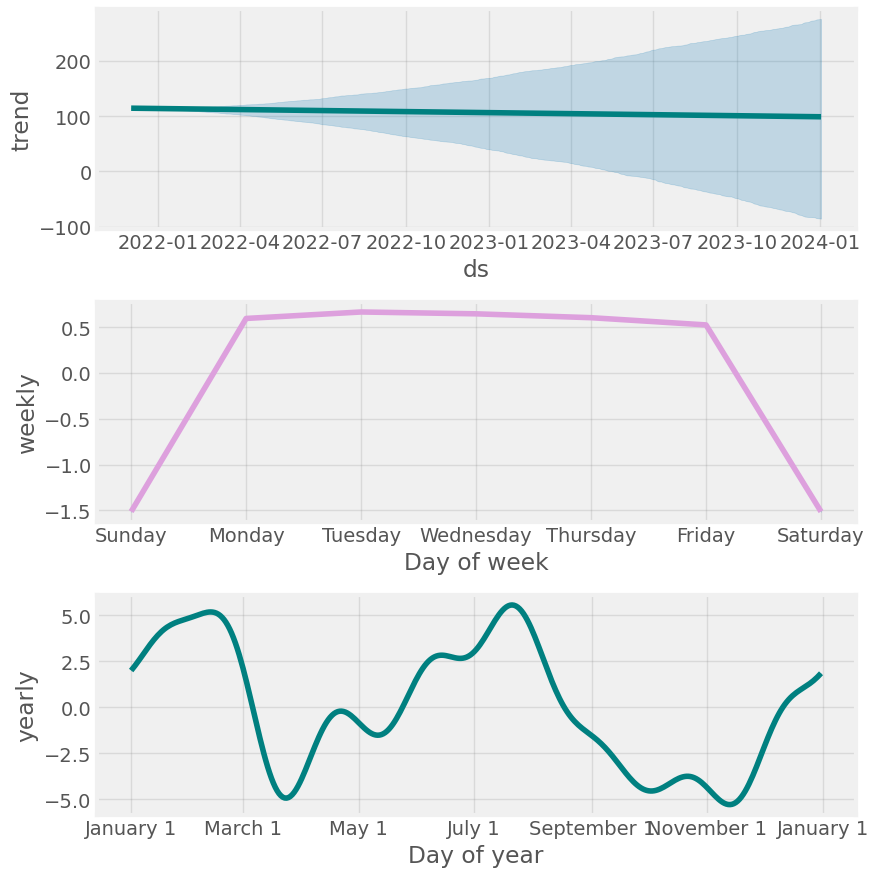

In [377]:
fig = model.plot_components(df_test_fcst)
ax = fig.get_axes()
colors = ['teal', 'plum', 'teal', 'plum']
for i, axis in enumerate(ax):
    for line in axis.get_lines():
        line.set_color(colors[i % len(colors)])

plt.show()

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


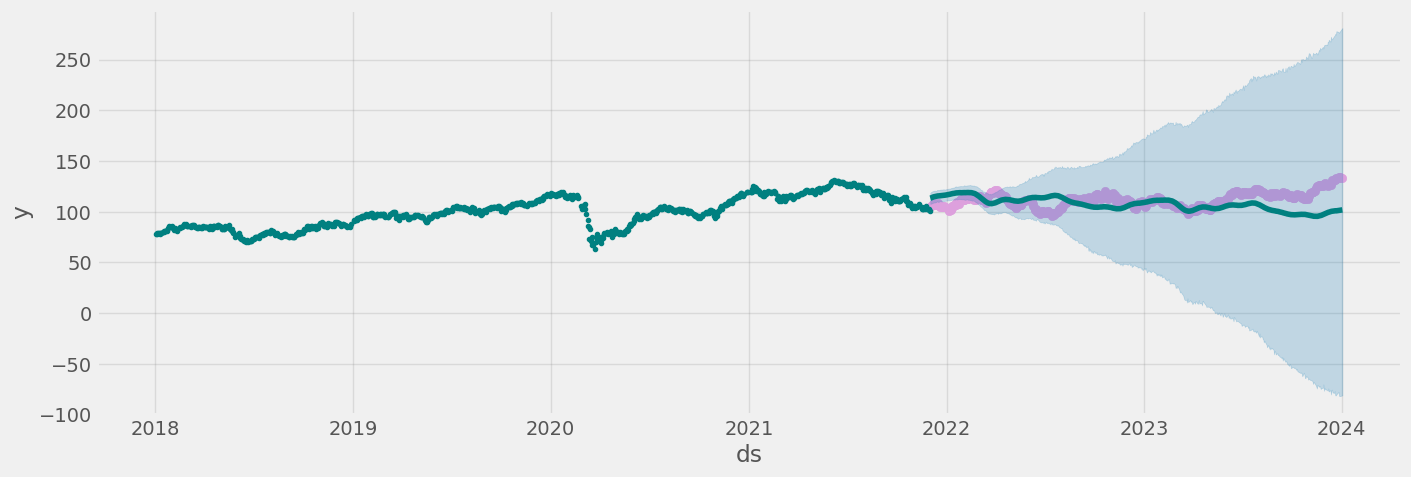

In [378]:
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(df_renomeado_test.index, df_renomeado_test['y'], color='plum')
fig = model.plot(df_test_fcst, ax=ax)
for line in ax.get_lines():
    line.set_color('teal')
plt.show()

Datas em nossa base em que o fechamento sofreu mudanças "drásticas":

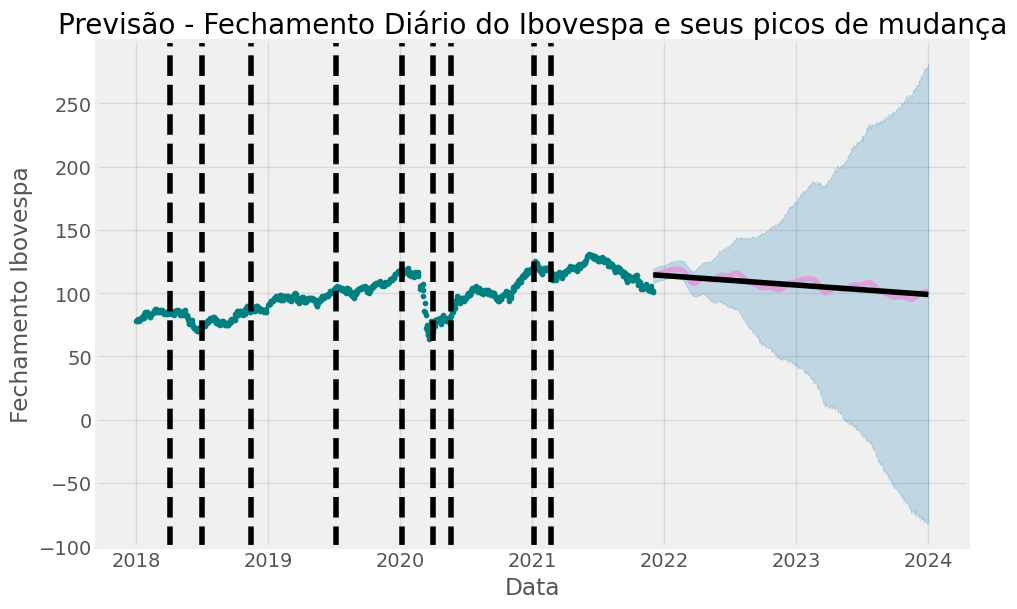

In [379]:
from prophet.plot import add_changepoints_to_plot
fig = model.plot(df_test_fcst)
mudancas = add_changepoints_to_plot(fig.gca(), model, df_test_fcst)
ax = fig.gca()
ax.get_lines()[0].set_color('teal')
ax.get_lines()[1].set_color('plum')
for line in ax.get_lines()[2:]:
    line.set_color('black')
ax.set_title('Previsão - Fechamento Diário do Ibovespa e seus picos de mudança')
ax.set_xlabel('Data')
ax.set_ylabel('Fechamento Ibovespa')
plt.show()

In [380]:
model.changepoints

31    2018-02-19
62    2018-04-04
93    2018-05-18
124   2018-07-03
155   2018-08-16
186   2018-10-01
217   2018-11-16
248   2019-01-07
279   2019-02-20
310   2019-04-08
341   2019-05-23
372   2019-07-08
402   2019-08-20
433   2019-10-02
464   2019-11-14
495   2020-01-06
526   2020-02-18
557   2020-04-03
588   2020-05-21
619   2020-07-06
650   2020-08-18
681   2020-10-01
712   2020-11-17
743   2021-01-05
774   2021-02-22
Name: ds, dtype: datetime64[ns]

# Análise de acuracidade com Erro Percentual Absoluto Médio

In [381]:
np.sqrt(mean_squared_error(y_true= df_test_prophet['y'], y_pred= df_test_fcst['yhat']))

8.460277434341416

In [382]:
mean_absolute_error(y_true= df_test_prophet['y'], y_pred= df_test_fcst['yhat'])

6.993259877290302

In [383]:
mean_absolute_percentage_error(y_true= df_test_prophet['y'], y_pred= df_test_fcst['yhat'])

6.1793242665690755

Isso significa que, em média, os valores previstos pelo modelo diferem dos valores reais por aproximadamente 6.18%.